In [3]:
import pandas as pd
from datascience import *
import numpy as np
import matplotlib
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Understanding the Data

We began by first loading up the data and taking a look at the format, values, and basic statistics.

In [39]:
san_francisco = pd.read_csv("./datasets/Flood_Health_Vulnerability.csv")
san_francisco.head()

,Census Blockgroup,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingViolations,Homeless,LivAlone,FloodHealthIndex,FloodHealthIndex_Quintiles
0,60759809001,0.072957,8.037850e-10,0.599175,0.356678,0.996080,0.150559,-6.00000,0.182261,0.035771,22.0584,36.5200,15.1339,0.133608,14.10930,17.5025,0.480591,84.8190,5
1,60750201001,0.079893,1.240000e-01,0.651000,0.509706,0.724000,0.232000,7.83292,0.000000,0.020516,16.0115,62.0535,10.5741,0.238000,10.24060,15.8921,0.522000,83.4860,5
2,60750117001,0.027149,1.030000e-01,0.697000,0.378595,0.862000,0.171000,-1.99906,0.106609,0.005321,1.4068,98.5924,0.8008,0.187000,39.56220,4.9374,0.635000,83.4791,5
3,60750178021,0.084215,8.800000e-02,0.584000,0.327362,0.843000,0.119000,-5.96629,0.064579,0.024166,14.9856,54.0699,9.5802,0.229000,7.04366,19.2683,0.427000,82.4925,5
4,60750125012,0.095332,2.219991e-01,0.726001,0.794750,0.694997,0.202999,7.13278,0.000000,0.004105,15.5000,63.7499,12.9672,0.424998,13.72550,14.6184,0.731997,81.8061,5


In [17]:
san_francisco.describe()

,Census Blockgroup,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingViolations,Homeless,LivAlone,FloodHealthIndex,FloodHealthIndex_Quintiles
count,5.780000e+02,578.000000,5.780000e+02,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02,578.000000,578.000000,578.000000,578.000000,578.000000
mean,6.075033e+10,0.131671,1.430411e-01,0.567669,0.271585,0.869517,0.124782,124.147322,0.010224,0.007366,8.317175,19.953382,4.748124,1.034424e-01,6.021817,4.713140,0.347597,49.569516,3.000000
std,8.011773e+05,0.057074,6.102362e-02,0.213813,0.154539,0.108676,0.108760,104.939767,0.050148,0.014039,6.101610,15.429652,3.384794,5.513568e-02,8.160820,5.726493,0.148501,13.343632,1.416662
min,6.075010e+10,0.007243,8.037850e-10,0.128998,0.057373,0.363000,0.000000,-42.000000,0.000000,0.000000,0.000000,0.051100,0.000000,1.050660e-09,0.000000,0.260200,0.062731,19.293200,1.000000
25%,6.075017e+10,0.089490,1.020000e-01,0.403000,0.165123,0.814500,0.046000,35.303625,0.000000,0.000816,4.300800,9.040000,2.710900,7.424997e-02,2.830483,0.520700,0.227000,39.561450,2.000000
50%,6.075025e+10,0.133925,1.390000e-01,0.565000,0.234190,0.899000,0.104500,111.691500,0.000000,0.002560,6.428200,14.280000,3.823850,9.378748e-02,4.763075,3.131250,0.325000,47.929400,3.000000
75%,6.075033e+10,0.170120,1.730000e-01,0.721750,0.331840,0.954001,0.180500,183.484250,0.000000,0.007140,11.200000,26.817075,5.460375,1.150000e-01,7.256355,4.615400,0.458551,58.226175,4.000000
max,6.075981e+10,0.452256,5.540000e-01,0.981456,0.840098,1.000999,0.715007,558.279000,0.503456,0.155139,97.368700,98.592400,16.115600,4.520000e-01,170.940000,19.268300,0.732000,84.819000,5.000000


After taking a look at these tables and the data dictionary we understood that the demographics of the surveyed communitites were in the columns of `Children` to `LivAlone`. `FloodHealthIndex` was a metric established to evaluate the vulnerability of these communities during a flood in terms of health effects. The `FloodHealthIndex_Quintiles` split the range of Flood Health Indices into 5 categories with 1 being low risk and 5 being high risk.

## Correlation Analysis

As `FloodHealthIndex` was the established metric to evaluate vulnerability, next we wanted to see how much it correlated with each variable in order to determine likely correlations. To do this we started with a scatterplot of each variable plotted against `FloodHealthIndex` (FHI).

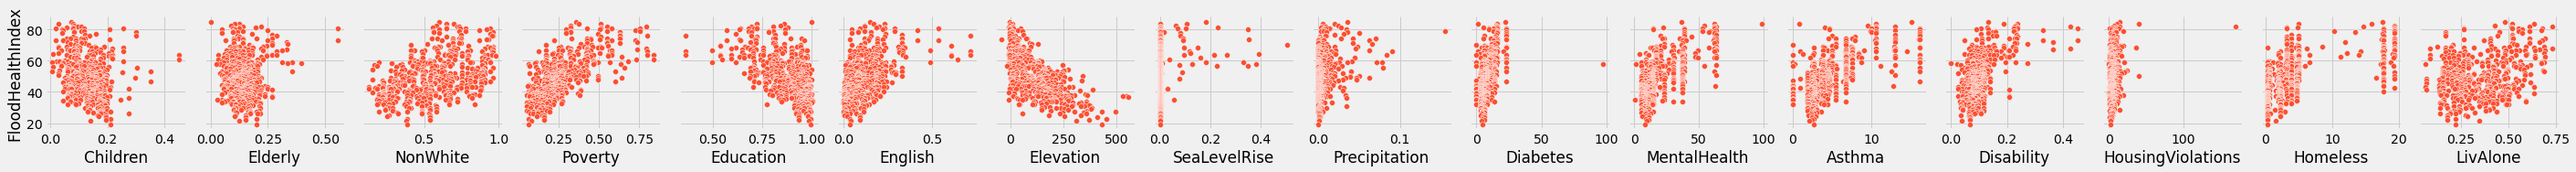

In [21]:
import seaborn as sns
pp = sns.pairplot(data=san_francisco,
                  y_vars=['FloodHealthIndex'],
                  x_vars=list(san_francisco.columns)[1:-2])
pp.map(sns.scatterplot);

Although no conclusions can be made, some clear trends can be seen through these plots. Except for the environmental variables (`Elevation`, `SeaLevelRise`, and `Precipitation`) and some housing variables (`Housing Violations` and `Homeless`) the rest are based on a percentage or rate scale. This means that it is possible to compare these graphs with similar scales. We can see that for `NonWhite` and `English`, as the proportion of those populations increases the `FloodHealthIndex` also increases, and the opposite holds true for `Education`.

It is very important to note that there are outliers in some of the variables making the scale of the plot bias the likely results, most easily seen in `Diabetes`, `Precipitation`, and `Housing Violations`. If we take a closer look at these graphs without the outlier we see the following:

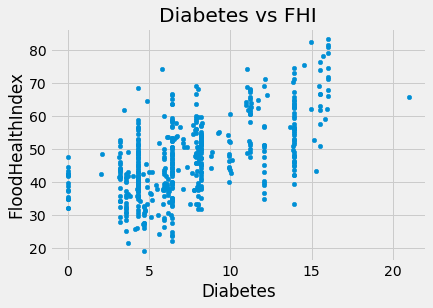

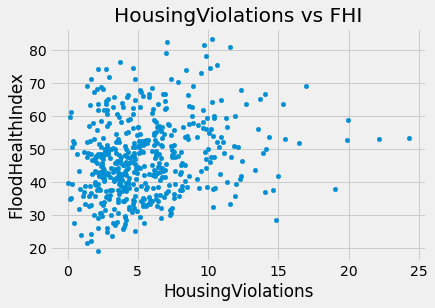

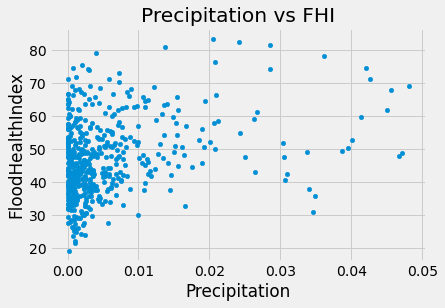

In [29]:
san_francisco_outlier_removed = san_francisco[(np.abs(stats.zscore(san_francisco)) < 3).all(axis=1)] #Gets rid of outliers
san_francisco_outlier_removed.plot("Diabetes", "FloodHealthIndex", kind="scatter", title="Diabetes vs FHI")
san_francisco_outlier_removed.plot("HousingViolations", "FloodHealthIndex", kind="scatter", title="HousingViolations vs FHI")
san_francisco_outlier_removed.plot("Precipitation", "FloodHealthIndex", kind="scatter", title="Precipitation vs FHI");

While these scales are more focused around the distribution, they show a clearer picture of the distribution in relation to FHI.

**Numerical Correlation**

Next we used Spearman's rank and Pearson correlation tests to check the linear and non-linear correlations of the values against FHI to obtain numbers to use in analysis. The correlation with the higher magnitude determined if the correlation was linear or nonlinear.

In [107]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
columns = list(san_francisco.columns)[1:-3]
fhi = san_francisco[['FloodHealthIndex']]

correlationType  = dict()
significant_metrics = {}
for column in columns:
    non_linear_corr, p1 = spearmanr(fhi, san_francisco[column])
    linear_corr, p2 = pearsonr(san_francisco[column], fhi)
    if abs(non_linear_corr) > abs(linear_corr[0]):
        larger_corr = non_linear_corr
        correlationType.update({column: "nonlinear"})
    else:
        larger_corr = linear_corr[0]
        correlationType.update({column: "linear"})
    if abs(larger_corr) >= .3:
        significant_metrics[column] = larger_corr

    print(f"{column}: {larger_corr} ({correlationType[column]})")

Children: -0.26308733248861554 (nonlinear)
Elderly: 0.07791234487601838 (linear)
NonWhite: 0.47987912437901153 (nonlinear)
Poverty: 0.693046296055 (nonlinear)
Education: -0.5637919102587561 (linear)
English: 0.5150096592691067 (nonlinear)
Elevation: -0.6729305040032092 (nonlinear)
SeaLevelRise: 0.2892299805806113 (nonlinear)
Precipitation: 0.309120722473337 (linear)
Diabetes: 0.5802448846886352 (nonlinear)
MentalHealth: 0.6621334818266624 (nonlinear)
Asthma: 0.6263732563188594 (nonlinear)
Disability: 0.5605332023005423 (linear)
HousingViolations: 0.20879543570571715 (linear)
Homeless: 0.614698873917741 (nonlinear)


We defined significant variables as those with a correlation greater than or equal to `0.3` and obtained the following values:

In [108]:
significant_metrics

{'NonWhite': 0.47987912437901153,
 'Poverty': 0.69304629605500001,
 'Education': -0.5637919102587561,
 'English': 0.51500965926910669,
 'Elevation': -0.6729305040032092,
 'Precipitation': 0.309120722473337,
 'Diabetes': 0.58024488468863522,
 'MentalHealth': 0.66213348182666243,
 'Asthma': 0.62637325631885943,
 'Disability': 0.5605332023005423,
 'Homeless': 0.61469887391774103}

To further confirm these values as the best choice, we decided to run A/B testing. To do so we need a binary metric, and one that can group FHI accurately is the pre-established `FloodHealthIndex_Quintiles` metric. The quintiles cannot be divided into A and B groups easily, so we further divided the data into deciles. The upper 6-10 deciles will be classified as high risk, and the lower 1-5 will be classified as low risk. Those categories will then be run against the significant metrics.

In [109]:
san_francisco_deciles = Table.read_table("./datasets/Flood_Health_Decile_Sort.csv")

def risk_sort(decile):
    if decile in np.arange(6, 11):
        return "High"
    else:
        return "Low"

san_francisco_risk_sort = san_francisco_deciles.with_column("Risk", san_francisco_deciles.apply(risk_sort, "Deciles"))
san_francisco_risk_sort.show(5)

Census Blockgroup,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingViolations,Homeless,LivAlone,FloodHealthIndex,Deciles,FloodHealthIndex_Quintiles,Risk
60759809001,0.0729571,8.03785e-10,0.599175,0.356678,0.99608,0.150559,-6,0.182261,0.035771,22.0584,36.52,15.1339,0.133608,14.1093,17.5025,0.480591,84.819,10,5,High
60750201001,0.079893,0.124,0.651,0.509706,0.724,0.232,7.83292,0,0.0205164,16.0115,62.0535,10.5741,0.238,10.2406,15.8921,0.522,83.486,10,5,High
60750117001,0.027149,0.103,0.697,0.378595,0.862,0.171,-1.99906,0.106609,0.00532113,1.4068,98.5924,0.8008,0.187,39.5622,4.9374,0.635,83.4791,10,5,High
60750178021,0.084215,0.088,0.584,0.327362,0.843,0.119,-5.96629,0.0645794,0.0241664,14.9856,54.0699,9.5802,0.229,7.04366,19.2683,0.427,82.4925,10,5,High
60750125012,0.0953315,0.221999,0.726001,0.79475,0.694997,0.202999,7.13278,0,0.00410501,15.5,63.7499,12.9672,0.424998,13.7255,14.6184,0.731997,81.8061,10,5,High


In [110]:
def difference_in_proportion(sample, variable_used):
    proportions = sample.group("Risk", np.mean)
    prop_high = proportions.where("Risk", "High").column(f"{variable_used} mean").item(0)
    prop_low = proportions.where("Risk", "Low").column(f"{variable_used} mean").item(0)
    return prop_high - prop_low

def simulate_one_stat(variable_used):
    shuffled = san_francisco_risk_sort.sample(with_replacement=False).column("Risk")
    original_with_shuffled_labels = san_francisco_risk_sort.with_column("Risk", shuffled)
    return difference_in_proportion(original_with_shuffled_labels, variable_used)

In [106]:
trials = 1000
variable_test_results = Table()
variables = list(significant_metrics.keys())

for i in variables:
    test_stats = make_array()
    for j in np.arange(trials):
        test_stats = np.append(test_stats, simulate_one_stat(i))
    variable_test_results = variable_test_results.with_column(i, test_stats)

variable_test_results

NonWhite,Poverty,Education,English,Elevation,Diabetes,MentalHealth,Asthma,Disability,Homeless
-0.0154532,0.000763046,-0.00500423,0.00046256,6.01458,-0.527499,2.11898,-0.0183472,-0.00152781,0.128841
-0.0131207,0.0185327,-0.0162146,0.0133602,5.54165,-0.602469,-0.219872,-0.308635,-0.00100974,0.562634
-0.0432397,0.0107898,-0.0178414,0.00562835,-3.34431,0.351051,2.00568,-0.0616334,-0.00319887,-1.04598
-0.00928702,-0.00769209,-0.0116148,-0.00523428,-14.8856,0.534979,1.34849,0.040154,-0.0025464,0.321701
0.0330433,-0.0119656,-0.00437411,0.00998654,-5.00778,0.00188393,1.13881,0.0963245,0.0086659,0.0158728
-0.0289147,0.00575347,0.00161974,-0.00781714,7.10533,0.233119,-1.93177,0.330631,0.00321975,-0.417969
-0.0135156,-0.00291692,-0.0122533,0.0121948,4.84183,-0.100727,-1.4074,0.0149408,-0.000888384,-0.23804
0.0273658,0.01046,-0.00321426,-0.00216548,4.70024,-0.059978,0.78896,0.265983,-0.00595763,0.0234358
-0.0330608,-0.00220177,-0.00700397,0.00865491,-5.47115,0.30238,-1.62194,0.176487,0.00704046,-0.345024
0.0284251,-0.00659218,-0.00588428,-0.0018939,13.7817,0.760483,1.05471,0.0193036,0.00047641,0.602683


The data simulated represented the values of the variables if the health indices were randomly assigned. As seen, the simulated p-vales are very low in almost every category. The p-values of the original data are compared below.

In [90]:
means_difference_original = Table()

for i in variables:
    means_difference_original = means_difference_original.with_column(i, difference_in_proportion(san_francisco_risk_sort, i))

means_difference_original

NonWhite,Poverty,Education,English,Elevation,Diabetes,MentalHealth,Asthma,Disability,Homeless
0.183522,0.167578,-0.101418,0.0890349,-111.666,4.93058,14.9526,3.19583,0.0387502,4.68586


In [102]:
p_values_above_original = Table()
p_values_below_original = Table()

for i in variables:
    p_values_above_original = p_values_above_original.with_column(i, sum(variable_test_results.column(i) >= means_difference_original.column(i).item(0))/len(variable_test_results.column(i)))

for i in variables:
    p_values_below_original = p_values_below_original.with_column(i, sum(variable_test_results.column(i) <= means_difference_original.column(i).item(0))/len(variable_test_results.column(i)))

p_values_above_original.drop("Education", "Elevation")

NonWhite,Poverty,English,Diabetes,MentalHealth,Asthma,Disability,Homeless
0,0,0,0,0,0,0,0


In [103]:
p_values_below_original.select("Education", "Elevation")

Education,Elevation
0,0


This A/B Test was run with the negative means being the lower p-value bound and the positive means being the upper bound. As seen, the p-value for every metric is 0, below the standard cutoff of 5%. This shows that all of these values in correlation to the risk level are highly unlikely to be due to random chance, making all the variables worth using in modeling and to predict the correlation of other districts FHI through analysis of the chosen variables.

## Conclusion

Using scatterplot visuals, Spearman and Pearson correlation, and A/B testing we determined variables that correlate to an area's risk of increased FHI, meaning the effect of flooding on the community's health. Those variables are `NonWhite`,
 `Poverty`,
 `Education`,
 `English`,
 `Elevation`,
 `Precipitation`,
 `Diabetes`,
 `MentalHealth`,
 `Asthma`,
 `Disability`,
 `Homeless`. We will use those variables in modeling and prediction to develop a system for finding at risk communities and determining intervention strategies.